In [ ]:
# importa e instala o SimPEG - está funcionando
# https://docs.simpeg.xyz/content/tutorials/05-dcr/plot_fwd_1_dcr_sounding.html#sphx-glr-content-tutorials-05-dcr-plot-fwd-1-dcr-sounding-py

!git clone https://github.com/simpeg/simpeg
%cd simpeg
!pip install -r requirements.txt   # precisava desta linha
!python setup.py install

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt

from discretize import TensorMesh

from SimPEG import maps
from SimPEG.electromagnetics.static import resistivity as dc
from SimPEG.electromagnetics.static.utils.static_utils import plot_layer

save_file = False

In [ ]:
a_min = 20.0
a_max = 500.0
n_stations = 25

electrode_separations = np.linspace(a_min, a_max, n_stations)

In [24]:
# configuração da SEV Wenner

source_list = []

for ii in range(0, len(electrode_separations)):
  a = electrode_separations[ii]
  A_location = np.r_[-1.5 * a, 0.0,0.0]  # concatena slices de arrays em uma linha (eixo 0)
  B_location = np.r_[1.5 * a, 0.0,0.0]

  M_location = np.r_[-0.5 * a, 0.0, 0.0]
  N_location = np.r_[0.5 * a, 0.0, 0.0]

  receiver_list = dc.receivers.Dipole(M_location, N_location)
  receiver_list = [receiver_list]

  source_list.append(dc.sources.Dipole(receiver_list, A_location, B_location))

survey = dc.Survey(source_list)

In [73]:
# modelo 1D - S40 Bebedouro
model = np.r_[50.0, 300.0, 35.0, 1000]
layer_thicknesses = np.r_[0.5, 5.0, 80.0]
model_map = maps.IdentityMap(nP=len(model))

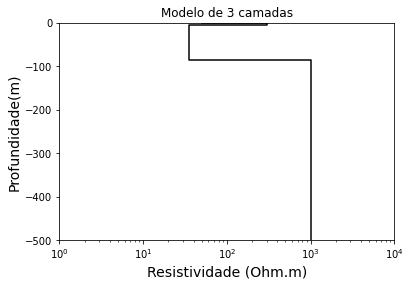

In [74]:
max_depth = 500
mesh = TensorMesh([np.r_[layer_thicknesses, max_depth - layer_thicknesses.sum()]])
plot_layer(model_map * model, mesh)

plt.xlabel('Resistividade (Ohm.m)')
plt.ylabel('Profundidade(m)')
plt.title('Modelo de 3 camadas')
plt.xlim([1e0, 1e4])
plt.show()

In [75]:
# Modelagem

simulation = dc.simulation_1d.Simulation1DLayers(
    survey = survey,
    rhoMap = model_map,
    thicknesses=layer_thicknesses,
    data_type="apparent_resistivity"
)

dpred = simulation.dpred(model)

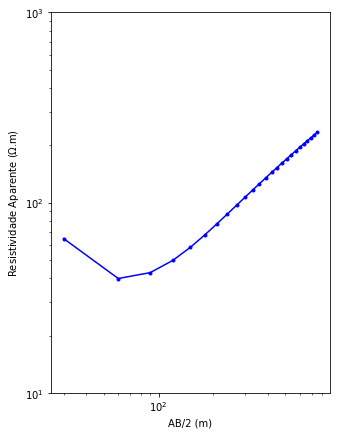

In [78]:
fig, ax1 = plt.subplots(figsize=(5, 7))
ax1.loglog(1.5*electrode_separations, dpred, 'b')
ax1.plot(1.5*electrode_separations, dpred, '.b')
ax1.set_xlabel('AB/2 (m)')
ax1.set_ylabel('Resistividade Aparente ($\Omega$.m)')
ax1.set_ylim([10, 1000])
plt.show()